In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import plotly.graph_objects as go
import statsmodels.api as sm
import math
import plotly.express as px
import random

In [4]:
df_titles= pd.read_csv('/content/drive/MyDrive/titles.csv', usecols=['id','title','type','release_year','genres','imdb_votes','imdb_score','tmdb_popularity','tmdb_score'])
df_credits= pd.read_csv('/content/drive/MyDrive/credits.csv')

In [5]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5850 non-null   object 
 1   title            5849 non-null   object 
 2   type             5850 non-null   object 
 3   release_year     5850 non-null   int64  
 4   genres           5850 non-null   object 
 5   imdb_score       5368 non-null   float64
 6   imdb_votes       5352 non-null   float64
 7   tmdb_popularity  5759 non-null   float64
 8   tmdb_score       5539 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 411.5+ KB


In [6]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [7]:
df_titles.describe()

,release_year,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [9]:
df_credits.describe()

,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06


In [10]:
merged_df = pd.merge(df_titles, df_credits, on='id', how='inner')

In [11]:
merged_df.head()

,id,title,type,release_year,genres,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR


In [12]:
print(merged_df.isnull().sum())

id                    0
title                 1
type                  0
release_year          0
genres                0
imdb_score         3950
imdb_votes         4037
tmdb_popularity      11
tmdb_score         1137
person_id             0
name                  0
character          9772
role                  0
dtype: int64


In [23]:
def fill_missing_values(df, column, strategy='mean'):
    if strategy == 'mean':
        fill_value = df[column].mean()
    elif strategy == 'median':
        fill_value = df[column].median()
    elif strategy == 'mode':
        fill_value = df[column].mode().iloc[0]
    else:
        raise ValueError("Invalid strategy! Please choose 'mean', 'median', or 'mode'.")

    df[column].fillna(fill_value, inplace=True)


fill_missing_values(merged_df, 'imdb_score', strategy='mean')
fill_missing_values(merged_df, 'tmdb_popularity', strategy='median')
fill_missing_values(merged_df, 'tmdb_score', strategy='median')
fill_missing_values(merged_df, 'imdb_votes', strategy='mean')
merged_df['character'].fillna('Unknown', inplace=True)
merged_df['title'].fillna('Unknown', inplace=True)

In [24]:
print(merged_df.isnull().sum())

id                 0
title              0
type               0
release_year       0
genres             0
imdb_score         0
imdb_votes         0
tmdb_popularity    0
tmdb_score         0
person_id          0
name               0
character          0
role               0
dtype: int64


In [27]:
duplicate_rows = merged_df.duplicated().sum()

print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [31]:
merged_df.columns = merged_df.columns.str.title()

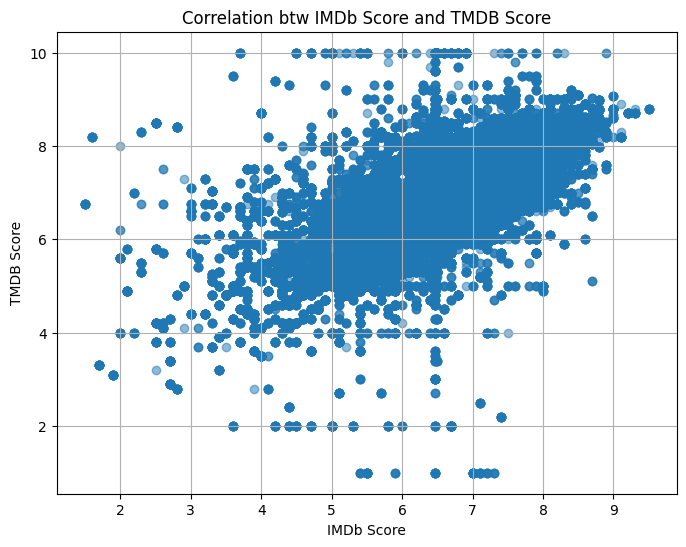

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Imdb_Score'], merged_df['Tmdb_Score'], alpha=0.5)
plt.title('Correlation btw IMDb Score and TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.grid(True)
plt.show()

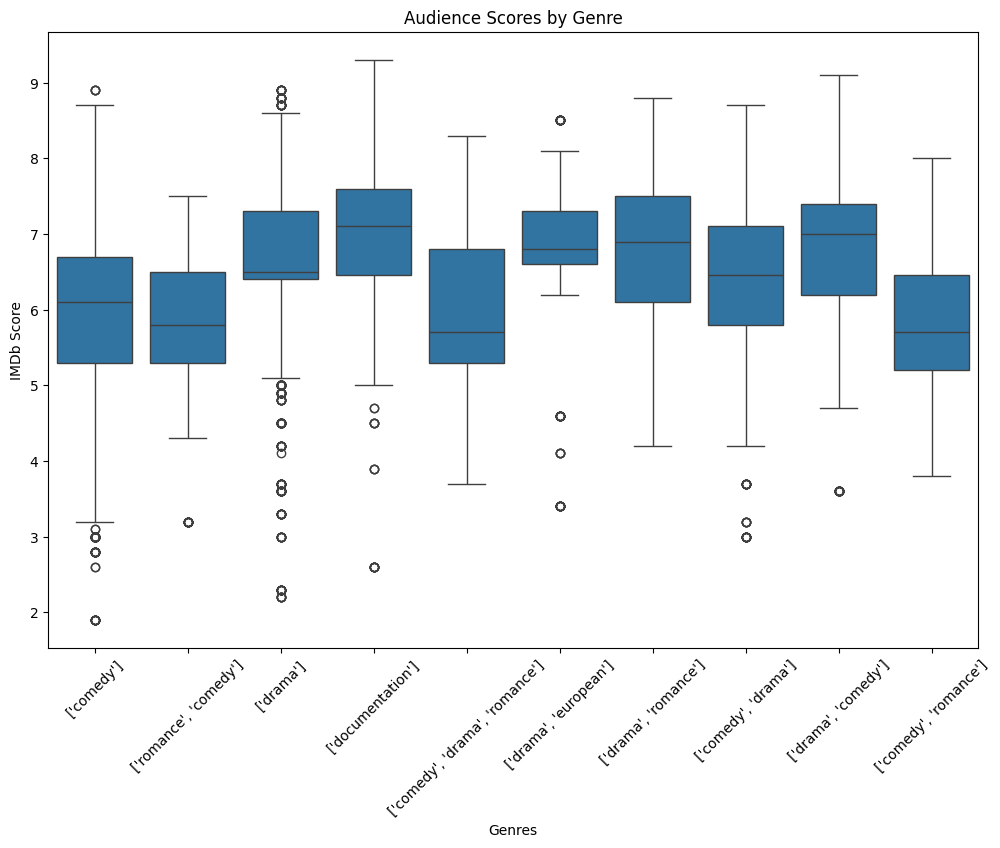

In [43]:
top_genres = merged_df['Genres'].value_counts().head(10).index

filtered_df = merged_df[merged_df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres', y='Imdb_Score', data=filtered_df)
plt.title('Audience Scores by Genre')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()


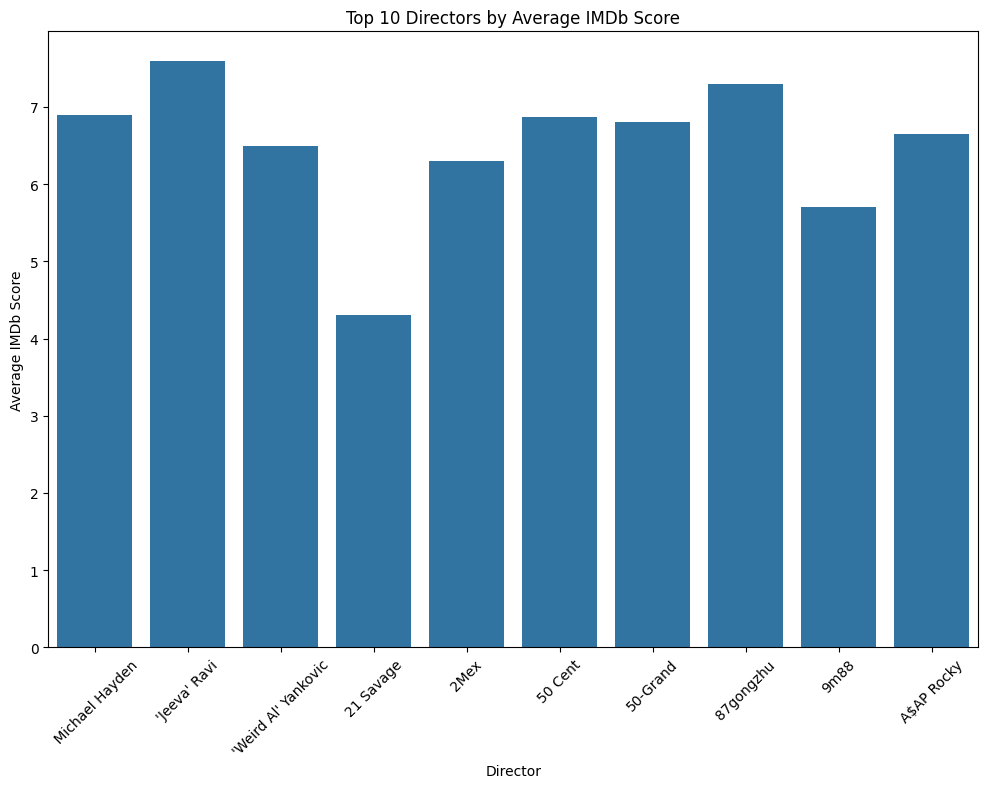

In [34]:
director_avg_imdb_scores = merged_df.groupby('Name')['Imdb_Score'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='Imdb_Score', data=director_avg_imdb_scores.head(10))
plt.title('Top 10 Directors by Average IMDb Score')
plt.xlabel('Director')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()